In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/income.csv") 
# Drop the 'names' columns
df = df.drop(['Name'], axis='columns')
# Rename income column to remove brackets
df = df.rename(columns={"Income($)": "Income"})
df.head()


,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


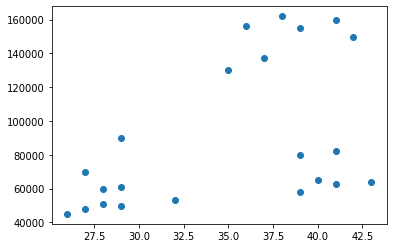

In [46]:
# plot a scatter to see distribution
plt.scatter(df.Age,df.Income)

In [53]:
# Detected Issue: scaling is messed up
# The y axis goes from 40K to 160K (very wide), while X axis is only 27-42 (too narrow)

# Use MinMax scaler to scale the income feature
# It will rescale income to a range between 0 and 1
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df.Income = scaler.transform(df[['Income']])

# Do the same scalling for Age (between 0 and 1)
scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])

df.head()

,Age,Income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


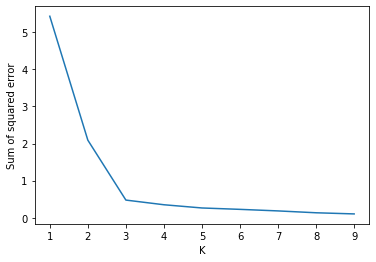

In [55]:
# Since this is a simple distribution with clear clusters (in 2 dimensions) its easy to see 3 ks are needed
# However, use the 'elbow method' to verify (use this for more complex datasets that wont be able to be visualized)

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)  # this appends the SSE error to each iteration

# plot the elbow plot (result: k=3 at the elbow/hinge point of the graph)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [56]:
# Load model, use 3 clusters:
km = KMeans(n_clusters=3)
# see available parameters (just use default here, check documentation for options)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
# can fit and predict at the same time with every model, by the way
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [60]:
# append new result
df['cluster'] = y_predicted

In [61]:
# Check the cluster centers 'centroids', which are dividing the clusters based on proximity
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

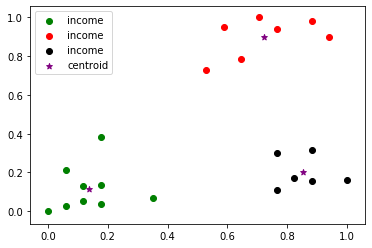

In [62]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age,df0['Income'],color='green', label='income')
plt.scatter(df1.Age,df1['Income'],color='red',label='income')
plt.scatter(df2.Age,df2['Income'],color='black', label='income')

# plot the k 'centroids' (x is the 0th column, y is the 1st column)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.legend()